In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM,Dense,Input,Embedding,Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from os.path import split

In [ ]:
data = pd.read_csv('news_data_Target.csv')

In [ ]:
data = data[['Target','content_title','content_summary']].dropna()

In [ ]:
data = pd.concat([data,pd.get_dummies(data['Target'])],axis=1).drop('Target',axis=1)

In [ ]:
data

,content_title,content_summary,Bearish,Bullish
0,3M Company (MMM): Among S&P 500 Stocks That Ou...,We recently published a list of 10 S&P 500 Sto...,False,True
2,3M Company (MMM): Jim Cramer on the “Once-Grea...,We recently published a list of 17 Best Stocks...,False,True
3,Looking for Dividend Stocks to Buy in February...,The Dow Jones Industrial Average (DJINDICES: ^...,False,True
4,Is 3M Company (MMM) The Best Manufacturing Sto...,We recently published a list of 10 Best Manufa...,False,True
5,Is 3M Company (MMM) the Best Industrial Stock ...,We recently published a list of 10 Best Indust...,True,False
...,...,...,...,...
23065,Soaring Egg Prices Reignite Debate Over Bird F...,Egg companies want the government to approve t...,False,True
23066,A Bird-Flu Vaccine Could Bring Down Egg Prices...,Vaccines are a hot potato in Washington these ...,False,True
23067,"Rule Breaker Investing Stock Stories, Vol. 10:...",Every stock tells a story; it takes humans to ...,False,True
23068,A bird flu vaccine for chickens is on its way,In a bid to contain a bird flu outbreak that h...,False,True


In [ ]:
data['artical'] = data['content_title'] + ' ' + data['content_summary']
labels =  np.array(data['Bullish'],dtype=np.int32) # 1=positive, 0=negative

In [ ]:
labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split

imdb_train, imdb_test = train_test_split(data, test_size=0.20, random_state=42)

In [ ]:
imdb_train

,content_title,content_summary,Bearish,Bullish,artical
388,"KKR, Apollo Tap $5.8 Trillion in Japan Life In...",(Bloomberg Markets) -- Wall Street is mining a...,False,True,"KKR, Apollo Tap $5.8 Trillion in Japan Life In..."
20948,Linde PLC (LIN) Q1 2024 Earnings: Adjusted EPS...,Comprehensive Analysis of Linde's Financial Pe...,True,False,Linde PLC (LIN) Q1 2024 Earnings: Adjusted EPS...
16062,Q4 2024 Huntington Ingalls Industries Inc Earn...,Q4 2024 Huntington Ingalls Industries Inc Earn...,False,True,Q4 2024 Huntington Ingalls Industries Inc Earn...
13912,Verizon Communications (NYSE:VZ) shareholders ...,"Ideally, your overall portfolio should beat th...",False,True,Verizon Communications (NYSE:VZ) shareholders ...
13300,Republic Services: Q4 Earnings Snapshot,The Phoenix-based company said it had profit o...,False,True,Republic Services: Q4 Earnings Snapshot The Ph...
...,...,...,...,...,...
12712,Ratings Giant Moody's Gets A Rating Upgrade Ah...,Market research shows that the top-performing ...,True,False,Ratings Giant Moody's Gets A Rating Upgrade Ah...
13392,Schlumberger Limited (SLB) is Attracting Inves...,"Recently, Zacks.com users have been paying clo...",True,False,Schlumberger Limited (SLB) is Attracting Inves...
6236,"Corteva, Inc.: Q4 Earnings Snapshot","INDIANAPOLIS (AP) — Corteva, Inc. CTVA) on Wed...",False,True,"Corteva, Inc.: Q4 Earnings Snapshot INDIANAPOL..."
973,Is Schwab Select Large Cap Growth Fund (LGILX)...,Mutual Fund Report for LGILX,True,False,Is Schwab Select Large Cap Growth Fund (LGILX)...


In [ ]:
x_train = imdb_train['artical']
y_train = imdb_train['Bullish']
x_test = imdb_test['artical']
y_test = imdb_test['Bullish']

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.zip

--2025-02-26 15:48:24--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.167.112.53, 3.167.112.66, 3.167.112.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.167.112.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10356881291 (9.6G) [application/zip]
Saving to: ‘wiki.en.zip’

wiki.en.zip         100%[===================>]   9.65G  41.7MB/s    in 4m 24s  

2025-02-26 15:52:48 (37.4 MB/s) - ‘wiki.en.zip’ saved [10356881291/10356881291]



In [ ]:
!unzip /content/wiki.en.zip

Archive:  /content/wiki.en.zip
  inflating: wiki.en.vec             
  inflating: wiki.en.bin             


In [ ]:
!rm /content/wiki.en.zip

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313472 sha256=7c862a68cb0d19473a374ab6e7ef33fc610c9a9ec991e28f4662a067556439c8
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [ ]:
from fasttext import load_model

In [ ]:
ft_model = load_model('/content/wiki.en.bin')

In [ ]:
max_len = 300

tk = Tokenizer(char_level = False, split = ' ')

tk.fit_on_texts(x_train)

In [ ]:
vocab_size = len(tk.word_index)

In [ ]:
seq_train = tk.texts_to_sequences(x_train)
seq_test = tk.texts_to_sequences(x_test)

In [ ]:
seq_train_matrix = sequence.pad_sequences(seq_train,maxlen = max_len)
seq_test_matrix = sequence.pad_sequences(seq_test,maxlen = max_len)

In [ ]:
embedding_matrix = np.zeros((vocab_size +1,300))

In [ ]:
embedding_matrix = np.zeros((vocab_size + 1,300))

In [ ]:
word_not_there = 0
for word,i in tk.word_index.items():
  embed_vector = ft_model.get_word_vector(word).astype('float32')

  if embed_vector is not None:
    embedding_matrix[i] = embed_vector
  else:
    print(word)
    word_not_there = word_not_there + 1

In [ ]:
word_not_there

0

In [ ]:
input = Input(name = 'review', shape = [max_len])
embed = Embedding(vocab_size + 1, 300,mask_zero = True,weights = [embedding_matrix],trainable = False)(input)

lstm_layer = LSTM(128)(embed)

dense_layer = Dense(64,activation = 'relu')(lstm_layer)
output = Dense(1,activation = 'sigmoid')(dense_layer)

model = Model(inputs = input, outputs = output)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ review (InputLayer)       │ (None, 300)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 300, 300)       │      4,530,300 │ review[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 300)            │              0 │ review[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 128)            │        219,648 │ embedding[0][0],       │
│                           │                        │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │          8,256 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │             65 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 4,758,269 (18.15 MB)

 Trainable params: 227,969 (890.50 KB)

 Non-trainable params: 4,530,300 (17.28 MB)

In [ ]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['acc'])
history = model.fit(seq_train_matrix,y_train,validation_data = [seq_test_matrix,y_test],epochs=50,verbose = 1)

Epoch 1/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 328s 621ms/step - acc: 0.5314 - loss: 0.6897 - val_acc: 0.5962 - val_loss: 0.6687
Epoch 2/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 338s 646ms/step - acc: 0.6169 - loss: 0.6436 - val_acc: 0.6753 - val_loss: 0.6011
Epoch 3/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 328s 627ms/step - acc: 0.7197 - loss: 0.5391 - val_acc: 0.7376 - val_loss: 0.5312
Epoch 4/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 336s 643ms/step - acc: 0.7979 - loss: 0.4194 - val_acc: 0.7904 - val_loss: 0.4520
Epoch 5/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 366s 612ms/step - acc: 0.8499 - loss: 0.3306 - val_acc: 0.8222 - val_loss: 0.3931
Epoch 6/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 325s 618ms/step - acc: 0.8829 - loss: 0.2652 - val_acc: 0.8442 - val_loss: 0.3771
Epoch 7/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 334s 639ms/step - acc: 0.8967 - loss: 0.2262 - val_acc: 0.8514 - val_loss: 0.3452
Epoch 8/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 371s 618ms/step - acc: 0.9059 - loss: 0.1960 - val_acc: 0.8597 - val_loss: 0.3595
Epoch 9/50
523/523 ━━━━━

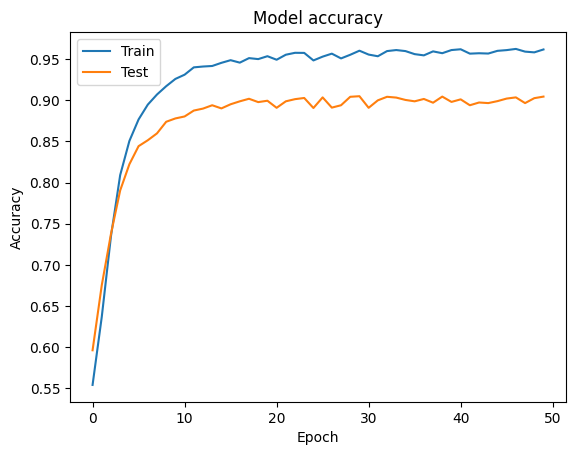

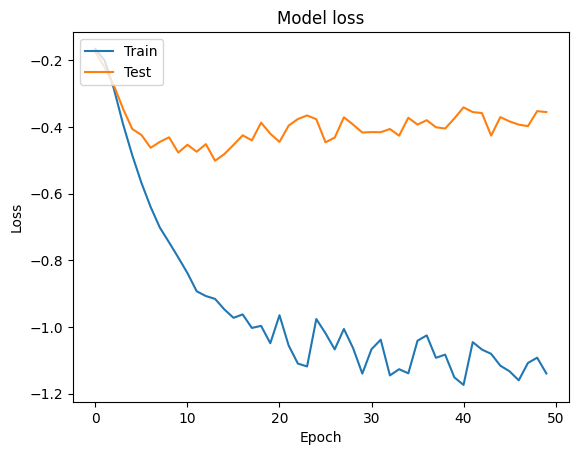

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(np.log10(history.history['loss']))
plt.plot(np.log10(history.history['val_loss']))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# Saving the model
from tensorflow.keras.models import model_from_json

model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)



In [ ]:
model.save_weights("model.weights.h5")

In [ ]:
# loading the model
from tensorflow.keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)



In [ ]:
loaded_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ review (InputLayer)       │ (None, 300)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 300, 300)       │      4,530,300 │ review[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 300)            │              0 │ review[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 128)            │        219,648 │ embedding[0][0],       │
│                           │                        │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │          8,256 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │             65 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 5,214,209 (19.89 MB)

 Trainable params: 227,969 (890.50 KB)

 Non-trainable params: 4,530,300 (17.28 MB)

 Optimizer params: 455,940 (1.74 MB)

In [ ]:
loaded_model.load_weights("model.weights.h5")

In [ ]:
imdb_test['content_title'].reset_index(drop=True, inplace=True)
imdb_test['content_summary'].reset_index(drop=True, inplace=True)


In [ ]:
loaded_model.predict(seq_test_matrix[0].reshape(1,-1))

131/131 ━━━━━━━━━━━━━━━━━━━━ 33s 251ms/step


array([[0.66545594],
       [0.5848239 ],
       [0.9999999 ],
       ...,
       [0.9999996 ],
       [0.43865272],
       [0.00261568]], dtype=float32)

In [ ]:
for i in range(len(imdb_test)):
  print("Title : ",imdb_test['content_title'][i])
  print("Summary :",imdb_test['content_summary'][i])
  if(model.predict(seq_test_matrix[i].reshape(1,-1)) > 0.5):
    print('Bullish\n')
  else:
    print('Bearish\n')

Streaming output truncated to the last 5000 lines.
Title :  Here's How You Can Earn $100 In Passive Income By Investing In Alexandria Real Estate Stock
Summary : Alexandria Real Estate Equities, Inc. (NYSE:ARE) is a best-in-class, mission-driven life science REIT that owns, operates and develops collaborative mega campuses in AAA life science innovation cluster locations, including Greater Boston, the San Francisco Bay Area, San Diego, Seattle, Maryland, Research Triangle and New York City. It will report its Q1 2025 earnings on April 21. Wall Street analysts expect the company to post an EPS of $2.30, down from $2.35 in the year-ago period. According to
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Bearish

Title :  Aon: Q4 Earnings Snapshot
Summary : DUBLIN (AP) — Aon PLC (AON) on Friday reported fourth-quarter net income of $716 million. The Dublin-based company said it had net income of $3.28 per share. Earnings, adjusted for non-recurring costs, were $4.42 per share.
1/1 ━━━━━━━━━━━━━━━━

In [ ]:
# # prompt: today date

# from datetime import date

# today = date.today()
# today


datetime.date(2025, 2, 23)

In [ ]:
# import os

# # Save the model in SavedModel format
# model_version = str(today)  # Or any version identifier
# export_path = os.path.join("models", model_version)

# # If the directory exists, remove it
# if os.path.isdir(export_path):
#     !rm -rf {export_path}

# # Save the model to the specified path
# tf.saved_model.save(model, export_path)

# print(f"Model saved to: {export_path}")


Model saved to: models/2025-02-23


In [ ]:
# model = tf.saved_model.load(export_path)

# print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
# # prompt: how do I load  models/2025-02-23 want to predict on seq_test_matrix

# import tensorflow as tf

# # Load the saved model
# model_version = "2025-02-23"  # Replace with the actual model version
# export_path = os.path.join("models", model_version)
# loaded_model = tf.saved_model.load(export_path)

# # Make predictions
# predictions = loaded_model(seq_test_matrix)

# # Print or process the predictions as needed
# predictions


In [ ]:
# # save this model

# from tensorflow import keras

# # Save the model
# model.save('my_model.keras')  # SavedModel format (default in TF 2.x+)
# # Or
# model.save('my_model.h5')      # Legacy HDF5 format

# # Load the model
# loaded_model = keras.models.load_model('my_model.keras')


In [ ]:
seq_test_matrix[0].reshape(1,-1)

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 